<a href="https://colab.research.google.com/github/bhargav23/AIML-DL-Lab/blob/main/2_PyTorch_MLP_for_MNIST_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Implement multilayer perceptron algorithm for MNIST Hand written Digit Classification**

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# =============================================================================
# 1. Device Configuration
# =============================================================================
# Check if a CUDA-enabled GPU is available, otherwise use the CPU.
# This allows the model to leverage GPU acceleration for faster training.
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

Using device: cpu


In [ ]:
# =============================================================================
# 2. Hyperparameters
# =============================================================================
# Define the key parameters for our model and training process.
input_size = 784  # Each MNIST image is 28x28 pixels, so 784 features when flattened.
hidden_size1 = 512 # Number of neurons in the first hidden layer.
hidden_size2 = 256 # Number of neurons in the second hidden layer.
num_classes = 10    # There are 10 digits to classify (0 through 9).
num_epochs = 15     # The number of times we'll iterate over the entire dataset.
batch_size = 128    # The number of images to process in a single batch.
learning_rate = 0.001 # The step size for the optimizer.

In [ ]:
# =============================================================================
# 3. Load and Prepare the MNIST Dataset
# =============================================================================
# Define a transform to normalize the data.
# ToTensor() converts the images from PILImage format to PyTorch Tensors
# and scales the pixel values from a [0, 255] range to a [0.0, 1.0] range.
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)) # Normalize to [-1, 1] range
])

# Download and load the training dataset.
train_dataset = torchvision.datasets.MNIST(root='./data',
                                           train=True,
                                           transform=transform,
                                           download=True)

# Download and load the test dataset.
test_dataset = torchvision.datasets.MNIST(root='./data',
                                          train=False,
                                          transform=transform)

# Create DataLoaders for both training and testing sets.
# DataLoaders provide an iterable over the given dataset, handling batching,
# shuffling, and parallel data loading.
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

Visualizing a batch of training data:


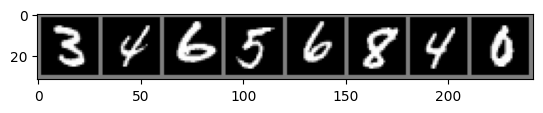

Labels:  3 4 6 5 6 8 4 0


In [ ]:
# =============================================================================
# 4. Visualize a Batch of Training Data
# =============================================================================
# It's always a good practice to look at your data before training.
def imshow(img):
    """Function to un-normalize and display an image."""
    img = img / 2 + 0.5  # Un-normalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Get one batch of training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# Show images
print("Visualizing a batch of training data:")
imshow(torchvision.utils.make_grid(images[:8])) # Show the first 8 images
# Print labels for the first 8 images
print('Labels: ', ' '.join(f'{labels[j]}' for j in range(8)))

In [ ]:
# =============================================================================
# 5. Define the Neural Network (MLP)
# =============================================================================
# We define our network as a class that inherits from nn.Module.
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, num_classes):
        super(NeuralNet, self).__init__()
        # Define the layers of the network
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(0.2)

        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(0.2)

        self.fc3 = nn.Linear(hidden_size2, num_classes)

    def forward(self, x):
        # Define the forward pass of the network.
        # This is where the data flows through the layers.
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.dropout1(out)

        out = self.fc2(out)
        out = self.relu2(out)
        out = self.dropout2(out)

        out = self.fc3(out)
        # No softmax here because nn.CrossEntropyLoss applies it internally.
        return out

# Instantiate the model and move it to the configured device (GPU or CPU).
model = NeuralNet(input_size, hidden_size1, hidden_size2, num_classes).to(device)



In [ ]:
# =============================================================================
# 6. Define Loss Function and Optimizer
# =============================================================================
# CrossEntropyLoss is well-suited for multi-class classification problems.
# It combines nn.LogSoftmax and nn.NLLLoss in one single class.
criterion = nn.CrossEntropyLoss()

# The Adam optimizer is an effective and popular choice for training neural networks.
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
# =============================================================================
# 7. Train the Model
# =============================================================================
print("\nStarting training...")
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    # Set the model to training mode
    model.train()
    for i, (images, labels) in enumerate(train_loader):
        # Reshape images to (batch_size, input_size) and move to device
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        # Forward pass: compute predicted outputs by passing inputs to the model
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()   # Clear the gradients of all optimized variables
        loss.backward()         # Compute gradient of the loss with respect to model parameters
        optimizer.step()        # Perform a single optimization step (parameter update)

        if (i+1) % 200 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

print("Finished training.")


Starting training...
Epoch [1/15], Step [200/469], Loss: 0.3338
Epoch [1/15], Step [400/469], Loss: 0.2195
Epoch [2/15], Step [200/469], Loss: 0.1880
Epoch [2/15], Step [400/469], Loss: 0.1492
Epoch [3/15], Step [200/469], Loss: 0.1377
Epoch [3/15], Step [400/469], Loss: 0.0558
Epoch [4/15], Step [200/469], Loss: 0.1604
Epoch [4/15], Step [400/469], Loss: 0.1298
Epoch [5/15], Step [200/469], Loss: 0.0729
Epoch [5/15], Step [400/469], Loss: 0.0332
Epoch [6/15], Step [200/469], Loss: 0.0785
Epoch [6/15], Step [400/469], Loss: 0.1232
Epoch [7/15], Step [200/469], Loss: 0.1709
Epoch [7/15], Step [400/469], Loss: 0.0614
Epoch [8/15], Step [200/469], Loss: 0.0768
Epoch [8/15], Step [400/469], Loss: 0.0607
Epoch [9/15], Step [200/469], Loss: 0.1552
Epoch [9/15], Step [400/469], Loss: 0.1552
Epoch [10/15], Step [200/469], Loss: 0.0912
Epoch [10/15], Step [400/469], Loss: 0.0325
Epoch [11/15], Step [200/469], Loss: 0.0724
Epoch [11/15], Step [400/469], Loss: 0.0516
Epoch [12/15], Step [200/469

In [ ]:
# =============================================================================
# 8. Evaluate the Model
# =============================================================================
print("\nEvaluating model on test data...")
# In test phase, we don't need to compute gradients
with torch.no_grad():
    # Set the model to evaluation mode
    model.eval()
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        outputs = model(images)

        # torch.max returns (value, index)
        _, predicted = torch.max(outputs.data, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network on the 10,000 test images: {acc:.2f} %')


Evaluating model on test data...
Accuracy of the network on the 10,000 test images: 97.72 %
